# Lab Assignment 1: Exploring Table Data

By Nick Chao & Carter Koehler

### 1. Business Understanding

...
...

Dataset: Intel CPUs URL: ""
Question of Interest: Which is the next Processor to End Interactive Support?

### 2. Data Understanding

2.1 Data Description

In [65]:
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import os
import sys

%matplotlib inline

from matplotlib import rcParams

rcParams['figure.figsize'] = 8,7

Here we have the potentially less interesting part of the analysis, the humble data-munging.

Some of what we do below is truly uninteresting, pulling numbers out of strings, converting "yes" to 1 and "no" to 0, etc., but there are some interesting choices to explore. For example, what to do about launch date.

There are a couple of different ways wee could go with this, just keeping the year, having separate features for year and quarter, putting everything on a continuum. Here we choose to turn everything into a float. This will make it harder to do things like group by time-period, but we gain the advantage of being able to sensibly plot things along a time axis and potential run regressions with launch as an explanatory variable.

In [66]:
data_dir = os.path.join(os.getcwd(), "..", "data")

cpu_data = pd.read_csv(os.path.join(data_dir, "Intel_CPUs.csv"))

# replace status names to numerical indicators
cpu_data.Status.replace(to_replace = ['Announced', 'Launched', 'End of Interactive Support', 'End of Life'],
                        value = range(1,5), inplace = True)

# replace launch_date to a measurable unit 
cpu_data.Launch_Date.replace(to_replace = ['Q1\'00', 'Q2\'00', 'Q3\'00', 'Q4\'00', 'Q1\'01', 'Q2\'01', 'Q3\'01', 'Q4\'01', 'Q1\'02', 'Q2\'02', 'Q3\'02', 'Q4\'02', 'Q1\'03', 'Q2\'03', 'Q3\'03', 'Q4\'03', 'Q1\'04', 'Q2\'04', 'Q3\'04', 'Q4\'04', 'Q1\'05', 'Q2\'05', 'Q3\'05', 'Q4\'05', 'Q1\'06', 'Q2\'06', 'Q3\'06', 'Q4\'06', 'Q1\'07', 'Q2\'07', 'Q3\'07', 'Q4\'07', 'Q1\'08', 'Q2\'08', 'Q3\'08', 'Q4\'08', 'Q1\'09', 'Q2\'09', 'Q3\'09', 'Q4\'09', 'Q1\'10', 'Q2\'10', 'Q3\'10', 'Q4\'10', 'Q1\'11', 'Q2\'11', 'Q3\'11', 'Q4\'11', 'Q1\'12', 'Q2\'12', 'Q3\'12', 'Q4\'12', 'Q1\'13', 'Q2\'13', 'Q3\'13', 'Q4\'13', 'Q1\'14', 'Q2\'14', 'Q3\'14', 'Q4\'14', 'Q1\'15', 'Q2\'15', 'Q3\'15', 'Q4\'15', 'Q1\'16', 'Q2\'16', 'Q3\'16', 'Q4\'16', 'Q1\'17', 'Q2\'17', 'Q3\'17', 'Q4\'17', 'Q1\'18', 'Q2\'18', 'Q3\'18', 'Q4\'18', 'Q1 \'15', '04\'16', 'Q1\'99', 'Q2\'99'],
                    value = [*np.arange(1,20,0.25), 15.75, 17.0, 0.0, 0.25], inplace = True)

In [67]:
default_columns = pd.options.display.max_columns
pd.options.display.max_columns = 99

display(cpu_data.head())

pd.options.display.max_columns = default_columns

Product_Collection Vertical_Segment  \
0  7th Generation Intel® Core™ i7 Processors           Mobile   
1  8th Generation Intel® Core™ i5 Processors           Mobile   
2  8th Generation Intel® Core™ i7 Processors           Mobile   
3           Intel® Core™ X-series Processors          Desktop   
4  7th Generation Intel® Core™ i5 Processors           Mobile   

  Processor_Number  Status  Launch_Date Lithography  \
0          i7-7Y75       2         17.5       14 nm   
1         i5-8250U       2         18.5       14 nm   
2         i7-8550U       2         18.5       14 nm   
3          i7-3820       4         13.0       32 nm   
4          i5-7Y57       2         18.0       14 nm   

  Recommended_Customer_Price  nb_of_Cores  nb_of_Threads  \
0                   $393.00             2            4.0   
1                   $297.00             4            8.0   
2                   $409.00             4            8.0   
3                   $305.00             4            8.0   
4                   $281.00             2            4.0   

  Processor_Base_Frequency Max_Turbo_Frequency             Cache    Bus_Speed  \
0                 1.30 GHz            3.60 GHz   4 MB SmartCache   4 GT/s OPI   
1                 1.60 GHz            3.40 GHz   6 MB SmartCache   4 GT/s OPI   
2                 1.80 GHz            4.00 GHz   8 MB SmartCache   4 GT/s OPI   
3                 3.60 GHz            3.80 GHz  10 MB SmartCache  5 GT/s DMI2   
4                 1.20 GHz            3.30 GHz   4 MB SmartCache   4 GT/s OPI   

     TDP Embedded_Options_Available Conflict_Free Max_Memory_Size  \
0  4.5 W                         No           Yes           16 GB   
1   15 W                         No           Yes           32 GB   
2   15 W                         No           Yes           32 GB   
3  130 W                         No           NaN        64.23 GB   
4  4.5 W                         No           Yes           16 GB   

              Memory_Types  Max_nb_of_Memory_Channels Max_Memory_Bandwidth  \
0  LPDDR3-1866, DDR3L-1600                        2.0            29.8 GB/s   
1   DDR4-2400, LPDDR3-2133                        2.0            34.1 GB/s   
2   DDR4-2400, LPDDR3-2133                        2.0            34.1 GB/s   
3      DDR3 1066/1333/1600                        4.0            51.2 GB/s   
4  LPDDR3-1866, DDR3L-1600                        2.0            29.8 GB/s   

  ECC_Memory_Supported  Processor_Graphics_ Graphics_Base_Frequency  \
0                   No                  NaN                 300 MHz   
1                   No                  NaN                 300 MHz   
2                   No                  NaN                 300 MHz   
3                   No                  NaN                     NaN   
4                   No                  NaN                 300 MHz   

  Graphics_Max_Dynamic_Frequency Graphics_Video_Max_Memory  Graphics_Output  \
0                       1.05 GHz                     16 GB  eDP/DP/HDMI/DVI   
1                       1.10 GHz                     32 GB  eDP/DP/HDMI/DVI   
2                       1.15 GHz                     32 GB  eDP/DP/HDMI/DVI   
3                            NaN                       NaN              NaN   
4                        950 MHz                     16 GB  eDP/DP/HDMI/DVI   

   Support_4k Max_Resolution_HDMI Max_Resolution_DP  \
0         NaN      4096x2304@24Hz    3840x2160@60Hz   
1         NaN      4096x2304@24Hz    4096x2304@60Hz   
2         NaN      4096x2304@24Hz    4096x2304@60Hz   
3         NaN                 NaN               NaN   
4         NaN      4096x2304@24Hz    3840x2160@60Hz   

  Max_Resolution_eDP_Integrated_Flat_Panel DirectX_Support  OpenGL_Support  \
0                           3840x2160@60Hz              12             NaN   
1                           4096x2304@60Hz              12             NaN   
2                           4096x2304@60Hz              12             NaN   
3                          

In [68]:
# find the data summary
cpu_data.describe()

Status  Launch_Date  nb_of_Cores  nb_of_Threads  \
count  2283.000000  1871.000000  2283.000000    1427.000000   
mean      2.720105    13.124399     4.066579       8.728101   
std       0.771464     3.729452     6.329884       9.132518   
min       1.000000     0.000000     1.000000       1.000000   
25%       2.000000    11.000000     1.000000       4.000000   
50%       3.000000    14.000000     2.000000       4.000000   
75%       3.000000    16.000000     4.000000       8.000000   
max       4.000000    18.500000    72.000000      56.000000   

       Max_nb_of_Memory_Channels  Processor_Graphics_  Support_4k  \
count                1414.000000                  0.0         0.0   
mean                    2.615276                  NaN         NaN   
std                     1.470327                  NaN         NaN   
min                     1.000000                  NaN         NaN   
25%                     2.000000                  NaN         NaN   
50%                     2.000000                  NaN         NaN   
75%                     3.000000                  NaN         NaN   
max                    16.000000                  NaN         NaN   

       OpenGL_Support  Max_nb_of_PCI_Express_Lanes  
count             0.0                  1179.000000  
mean              NaN                    20.399491  
std               NaN                    12.868963  
min               NaN                     0.000000  
25%               NaN                    16.000000  
50%               NaN                    16.000000  
75%               NaN                    32.000000  
max               NaN                    48.000000

In [69]:
display(cpu_data.Max_Memory_Size.unique())

array(['16 GB', '32 GB', '64.23 GB', '4 GB', '8 GB', nan, '375 GB',
       '384 GB', '8.01 GB', '16.38 GB', '64 GB', '8.79 GB', '64.45 GB',
       '128 GB', '2 GB', '1 GB', '2.44 GB', '256 GB', '4.88 GB', '2.4 GB',
       '2.93 GB', '6 GB', '288 GB', '768 GB', '1.54 TB', '32.23 GB',
       '32.77 GB', '144 GB', '24 GB', '512 GB', '1.02 TB', '3.07 TB',
       '8.3 GB', '16.6 GB', '16.11 GB', '1.5 TB', '2.05 TB', '4.1 TB'], dtype=object)

In [70]:
# find the data type
cpu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 45 columns):
Product_Collection                          2283 non-null object
Vertical_Segment                            2283 non-null object
Processor_Number                            1934 non-null object
Status                                      2283 non-null int64
Launch_Date                                 1871 non-null float64
Lithography                                 2212 non-null object
Recommended_Customer_Price                  1301 non-null object
nb_of_Cores                                 2283 non-null int64
nb_of_Threads                               1427 non-null float64
Processor_Base_Frequency                    2265 non-null object
Max_Turbo_Frequency                         914 non-null object
Cache                                       2271 non-null object
Bus_Speed                                   1989 non-null object
TDP                                         2216 

In [71]:
data_features = ['Product_Collection', 'Vertical_Segment', 'Processor_Number', 'Recommended_Customer_Price', 'nb_of_Cores', 'nb_of_Threads', 'Processor_Base_Frequency', 'Cache', 'Bus_Speed', 'TDP', 'Embedded_Options_Available', 'Max_Memory_Size', 'Max_nb_of_Memory_Channels', 'Instruction_Set', 'Intel_Hyper_Threading_Technology_', 'Intel_64_', 'Execute_Disable_Bit', 'Status', 'Launch_Date']

# picking which features are going to be relevant to the analysis

cpu_df = cpu_data.filter(data_features)
cpu_df.dropna(axis=0, subset=['Processor_Number'], inplace=True)

# indexing the dataset by processor number

cpu_df.index = cpu_df.Processor_Number

# dropping anything that doesn't have an identifier

cpu_df.drop('Processor_Number', inplace=True)

In [72]:
# reducing collection variable down to just product line 

cpu_df.Product_Collection.replace(
    to_replace=['.*Core.*', '.*X-series.*', '.*Celeron.*', '.*Pentium.*', '.*Quark.*', '.*Core. [mM].*', '.*Atom.*', '.*Itanium.*', '.*Xeon.*'], 
    value=['Core', 'X-series', 'Celeron', 'Pentium', 'Quark', 'm', 'Atom', 'Itanium', 'Xeon'], regex=True, inplace=True)

cpu_df.drop(['Processor_Number'],  axis=1, inplace=True)

In [73]:
# encoding categorical variables as binary

cpu_df.replace(['Yes', 'No'], [1,0], inplace=True)

In [74]:
# cleaning up the price variable

def process_price(raw_price):
    if isinstance(raw_price, float):
        return raw_price
    elif '-' in raw_price:
        split_price = [float(price.strip(' ').strip('$').replace(',', '')) for price in raw_price.split('-')]
        return np.mean(split_price)
    else:
        return float(raw_price.strip('$').replace(',',''))

for entry in cpu_df.Recommended_Customer_Price:
    entry = process_price(entry)
    
cpu_df['Recommended_Customer_Price'] = cpu_df['Recommended_Customer_Price'].apply(process_price)

In [75]:
import re

# turning strings of numbers into actual numbers

def get_numbers(word):
    if isinstance(word, str):
        return float(re.findall('[\d]*[.]?[\d]+?', word)[0])
    else:
        return word
    
def process_computer_stats(stat):
    if isinstance(stat, float):
        return stat
    elif 'K' in stat:
        factor = 1000
    elif 'M' in stat:
        factor = 10**6
    elif 'G' in stat:
        factor = 10**9
    elif 'T' in stat:
        factor = 10**12
    else:
        factor = 1
       
    return factor * get_numbers(stat)

for column in ['TDP', 'Max_Memory_Size', 'Cache', 'Processor_Base_Frequency', 'Bus_Speed']:
    cpu_df[column] = cpu_df[column].apply(process_computer_stats)

In [79]:
# look upon my works, ye Mighty

default_columns = pd.options.display.max_columns
pd.options.display.max_columns = 99

display(cpu_df)

pd.options.display.max_columns = default_columns

Product_Collection Vertical_Segment  \
Processor_Number                                       
i7-7Y75                        Core           Mobile   
i5-8250U                       Core           Mobile   
i7-8550U                       Core           Mobile   
i7-3820                        Core          Desktop   
i5-7Y57                        Core           Mobile   
3205U                       Celeron           Mobile   
N2805                       Celeron           Mobile   
J1750                       Celeron          Desktop   
G1610                       Celeron          Desktop   
518                         Pentium           Mobile   
2020M                       Pentium           Mobile   
773                         Pentium           Mobile   
3825U                       Pentium           Mobile   
4405U                       Pentium           Mobile   
N3710                       Pentium           Mobile   
C1000                         Quark         Embedded   
J2850                       Pentium          Desktop   
J2900                       Pentium          Desktop   
J3710                       Pentium          Desktop   
J4205                       Pentium          Desktop   
N3700                       Pentium           Mobile   
N3510                       Pentium           Mobile   
N3520                       Pentium           Mobile   
N3530                       Pentium           Mobile   
N3540                       Pentium           Mobile   
N4200                       Pentium           Mobile   
4405Y                       Pentium           Mobile   
4415Y                       Pentium           Mobile   
4410Y                       Pentium           Mobile   
4415U                       Pentium           Mobile   
...                             ...              ...   
i5-6440EQ                      Core         Embedded   
i5-6400T                       Core          Desktop   
i5-6400                        Core          Desktop   
i5-6402P                       Core          Desktop   
i5-6500TE                      Core         Embedded   
i5-6500T                       Core          Desktop   
i5-6500                        Core          Desktop   
i5-6585R                       Core          Desktop   
i5-6600T                       Core          Desktop   
i5-6600K                       Core          Desktop   
i5-6685R                       Core          Desktop   
i5-6600                        Core          Desktop   
i3-6006U                       Core           Mobile   
i3-6100TE                      Core         Embedded   
i3-6100T                       Core          Desktop   
i3-6100                        Core          Desktop   
i3-6167U                       Core           Mobile   
i3-6157U                       Core           Mobile   
i3-6102E                       Core         Embedded   
i3-6100U                       Core           Mobile   
i3-6100H                       Core           Mobile   
i3-6320                        Core          Desktop   
i3-6300T                       Core          Desktop   
i3-6100E                       Core         Embedded   
i3-6300                        Core          Desktop   
M5-6Y54                        Core           Mobile   
M5-6Y57                        Core           Mobile   
M7-6Y75                        Core           Mobile   
i7-5550U                       Core           Mobile   
i7-5557U                       Core           Mobile   

                  Recommended_Customer_Price  nb_of_Cores  nb_of_Threads  \
Processor_Number                                                           
i7-7Y75                               393.00            2            4.0   
i5-8250U                              297.00            4            8.0   
i7-8550U                              409.00            4            8.0   
i7-3820                               305.00            4            8.0   
i5-7Y57                         

# Missing Values

Alright, it's time now to start handling our missing data. First, let's try to figure out what we're dealing with.

In [80]:
cpu_df.info()

cpu_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1934 entries, i7-7Y75 to i7-5557U
Data columns (total 18 columns):
Product_Collection                   1934 non-null object
Vertical_Segment                     1934 non-null object
Recommended_Customer_Price           1291 non-null float64
nb_of_Cores                          1934 non-null int64
nb_of_Threads                        1427 non-null float64
Processor_Base_Frequency             1916 non-null float64
Cache                                1932 non-null float64
Bus_Speed                            1641 non-null float64
TDP                                  1886 non-null float64
Embedded_Options_Available           1933 non-null float64
Max_Memory_Size                      1403 non-null float64
Max_nb_of_Memory_Channels            1414 non-null float64
Instruction_Set                      1842 non-null object
Intel_Hyper_Threading_Technology_    1846 non-null float64
Intel_64_                            1834 non-null float64
Execute_

Recommended_Customer_Price  nb_of_Cores  nb_of_Threads  \
count                 1291.000000  1934.000000    1427.000000   
mean                   841.621890     4.617373       8.728101   
std                   1443.550711     6.731525       9.132518   
min                      2.540000     1.000000       1.000000   
25%                    161.000000     2.000000       4.000000   
50%                    299.500000     2.000000       4.000000   
75%                    685.500000     4.000000       8.000000   
max                  13011.000000    72.000000      56.000000   

       Processor_Base_Frequency         Cache     Bus_Speed          TDP  \
count              1.916000e+03  1.932000e+03  1.641000e+03  1886.000000   
mean               2.341611e+09  8.183095e+06  1.807245e+09    62.541676   
std                7.135526e+08  9.621049e+06  2.876985e+09    46.277893   
min                3.200000e+07  8.000000e+03  0.000000e+00     0.000000   
25%                1.800000e+09  2.000000e+06  5.000000e+06    28.000000   
50%                2.300000e+09  4.000000e+06  5.330000e+08    51.000000   
75%                2.900000e+09  8.000000e+06  1.333000e+09    89.500000   
max                4.300000e+09  6.000000e+07  9.600000e+09   300.000000   

       Embedded_Options_Available  Max_Memory_Size  Max_nb_of_Memory_Channels  \
count                 1933.000000     1.403000e+03                1414.000000   
mean                     0.220900     2.658195e+11                   2.615276   
std                      0.414961     5.436237e+11                   1.470327   
min                      0.000000     1.000000e+09                   1.000000   
25%                      0.000000     1.600000e+10                   2.000000   
50%                      0.000000     3.200000e+10                   2.000000   
75%                      0.000000     2.560000e+11                   3.000000   
max                      1.000000     4.100000e+12                  16.000000   

       Intel_Hyper_Threading_Technology_    Intel_64_  Execute_Disable_Bit  \
count                        1846.000000  1834.000000          1846.000000   
mean                            0.579632     0.920938             0.973456   
std                             0.493752     0.269909             0.160790   
min                             0.000000     0.000000             0.000000   
25%                             0.000000     1.000000             1.000000   
50%                             1.000000     1.000000             1.000000   
75%                             1.000000     1.000000             1.000000   
max                             1.000000     1.000000             1.000000   

            Status  Launch_Date  
count  1934.000000  1811.000000  
mean      2.659772    13.440502  
std       0.811241     3.335035  
min       1.000000     4.250000  
25%       2.000000    11.000000  
50%       2.000000    14.250000  
75%       3.000000    16.000000  
max       4.000000    18.500000

Let's start by breaking things up into classes that seem to make sense. Product Collection seems like a decent place to start, as they are designed to be similar within their groups by Intel when they build them.

In [81]:
cpu_grp = cpu_df.groupby(by=['Product_Collection'])

display(cpu_grp.Product_Collection.count())

default_columns = pd.options.display.max_columns
pd.options.display.max_columns = 2000

display(cpu_grp.describe())

pd.options.display.max_columns = default_columns

Product_Collection
Atom       142
Celeron    208
Core       691
Itanium     27
Pentium    233
Quark       11
Xeon       622
Name: Product_Collection, dtype: int64

Bus_Speed                                           \
                       count          mean           std          min   
Product_Collection                                                      
Atom                    45.0  8.718222e+08  1.015365e+09    2500000.0   
Celeron                170.0  4.265000e+08  6.932589e+08          0.0   
Core                   667.0  5.555112e+08  1.188919e+09          0.0   
Itanium                 27.0  3.081407e+09  2.711326e+09  533000000.0   
Pentium                212.0  4.793892e+08  6.574014e+08          0.0   
Quark                    0.0           NaN           NaN          NaN   
Xeon                   520.0  4.420380e+09  3.632182e+09          0.0   

                                                                           \
                            25%           50%           75%           max   
Product_Collection                                                          
Atom                  2500000.0  5.330000e+08  2.500000e+09  2.500000e+09   
Celeron               5000000.0  4.000000e+08  5.330000e+08  4.000000e+09   
Core                  5000000.0  5.000000e+06  6.670000e+08  6.400000e+09   
Itanium             533000000.0  6.670000e+08  6.400000e+09  6.400000e+09   
Pentium               5000000.0  4.665000e+08  8.000000e+08  4.000000e+09   
Quark                       NaN           NaN           NaN           NaN   
Xeon                667000000.0  5.800000e+09  8.000000e+09  9.600000e+09   

                    Cache                                                     \
                    count          mean           std        min         25%   
Product_Collection                                                             
Atom                142.0  2.373352e+06  3.599069e+06   512000.0    512000.0   
Celeron             208.0  1.330231e+06  6.783038e+05   256000.0   1000000.0   
Core                691.0  5.003329e+06  2.908982e+06  1000000.0   3000000.0   
Itanium              27.0  1.948148e+07  7.717963e+06  6000000.0  12000000.0   
Pentium             233.0  2.223176e+06  9.834730e+05  1000000.0   2000000.0   
Quark                 9.0  1.511111e+04  2.666667e+03     8000.0     16000.0   
Xeon                622.0  1.719389e+07  1.168801e+07  2000000.0   8000000.0   

                                                        \
                           50%         75%         max   
Product_Collection                                       
Atom                 1000000.0   2000000.0  16000000.0   
Celeron              1500000.0   2000000.0   2000000.0   
Core                 4000000.0   6000000.0  25000000.0   
Itanium             20000000.0  24000000.0  32000000.0   
Pentium              2000000.0   3000000.0   6000000.0   
Quark                  16000.0     16000.0     16000.0   
Xeon                12000000.0  24700000.0  60000000.0   

                   Embedded_Options_Available                                \
                                        count      mean       std  min  25%   
Product_Collection                                                            
Atom                                    142.0  0.415493  0.494551  0.0  0.0   
Celeron                                 208.0  0.283654  0.451858  0.0  0.0   
Core                                    690.0  0.171014  0.376795  0.0  0.0   
Itanium                                  27.0  0.000000  0.000000  0.0  0.0   
Pentium                                 233.0  0.188841  0.392225  0.0  0.0   
Quark                                    11.0  1.000000  0.000000  1.0  1.0   
Xeon                                    622.0  0.218650  0.413663  0.0  0.0   

                                  Execute_Disable_Bit                      \
                    50%  75%  max               count      mean       std   
Product_Collection                                                          
Atom                0.0  1.0  1.0                90.0  1.000000  0.000000   
Celeron             0.0  1.0  1.0   

Now that we know a little bit about our classes, let's start by just removing things that we really know nothing about. For example, to a first approximation, we have roughly zero Itanium or Quark processors. This should come as no surprise, as Itanium was a bit of a dud product line from Intel, and Quark is relatively new.

We are also going to get rid of extreme values of cores. We don't have a whole lot of 1-core processors or very high-core, super-computer style CPUs.

In [82]:
# removing data without much use

cpu_df = cpu_df[(cpu_df.nb_of_Cores < 50) & (cpu_df.nb_of_Cores > 1) & (cpu_df.Product_Collection != 'Itanium') & (cpu_df.Product_Collection != 'Quark')]

cpu_grp = cpu_df.groupby(by=['Product_Collection', 'nb_of_Cores'])

default_columns = pd.options.display.max_columns
pd.options.display.max_columns = 2000

display(cpu_grp.describe())

pd.options.display.max_columns = default_columns

Bus_Speed                              \
                                   count          mean           std   
Product_Collection nb_of_Cores                                         
Atom               2                 9.0  6.144444e+07  1.768333e+08   
                   4                 0.0           NaN           NaN   
                   8                 0.0           NaN           NaN   
                   12                0.0           NaN           NaN   
                   16                0.0           NaN           NaN   
Celeron            2                85.0  3.679529e+08  9.578222e+08   
                   4                 0.0           NaN           NaN   
Core               2               397.0  6.381524e+08  1.176754e+09   
                   4               239.0  3.649937e+08  1.070162e+09   
                   6                12.0  1.869417e+09  2.797134e+09   
                   8                 2.0  4.000000e+06  5.656854e+06   
                   10                1.0  8.000000e+06           NaN   
                   12                1.0  8.000000e+06           NaN   
                   14                1.0  8.000000e+06           NaN   
                   16                1.0  8.000000e+06           NaN   
                   18                1.0  8.000000e+06           NaN   
Pentium            2               141.0  4.097270e+08  7.889651e+08   
                   4                 0.0           NaN           NaN   
Xeon               2                60.0  1.349017e+09  1.456332e+09   
                   4               211.0  2.086209e+09  2.740761e+09   
                   6                67.0  5.513403e+09  2.764299e+09   
                   8                59.0  6.735593e+09  2.441718e+09   
                   10               45.0  7.448889e+09  1.514269e+09   
                   12               23.0  8.591304e+09  9.409439e+08   
                   14               14.0  9.257143e+09  6.813045e+08   
                   15               10.0  8.000000e+09  0.000000e+00   
                   16                8.0  9.400000e+09  5.656854e+08   
                   18               12.0  8.800000e+09  2.771281e+09   
                   20                2.0  9.600000e+09  0.000000e+00   
                   22                5.0  9.600000e+09  0.000000e+00   
                   24                2.0  9.600000e+09  0.000000e+00   
                   26                0.0           NaN           NaN   
                   28                0.0           NaN           NaN   

                                                                          \
                                         min           25%           50%   
Product_Collection nb_of_Cores                                             
Atom               2            2.500000e+06  2.500000e+06  2.500000e+06   
                   4                     NaN           NaN           NaN   
                   8                     NaN           NaN           NaN   
                   12                    NaN           NaN           NaN   
                   16                    NaN           NaN           NaN   
Celeron            2            2.500000e+06  5.000000e+06  5.000000e+06   
                   4                     NaN           NaN           NaN   
Core               2            2.500000e+06  5.000000e+06  5.000000e+06   
                   4            2.500000e+06  5.000000e+06  5.000000e+06   
                   6            0.000000e+00  5.000000e+06  5.000000e+06   
                   8            0.000000e+00  2.000000e+06  4.000000e+06   
                   10           8.000000e+06  8.000000e+06  8.000000e+06   
                   12           8.000000e+06  8.000000e+06  8.000000e+06   
                   14           8.000000e+06  8.000000e+06  8.000000e+06   
                   16           8.000000e+06  8.000000e+06  8.000000e+06   
                   18           8.000000e+06  8.000000e+06  8.000000e+

That seemed to help some, but we're still left with quite a bit of missing data, and we're going to have to do something about it. 

At this point, we're about to impute a lot of data, perhaps too much data. Realistically, recommended price should probably go, but it happens to be one of the more informative features we have, so throwing it out is something we'd like to avoid.

It would also be nice to take into account launch date, as that determines a lot of the information about a processor given its power and product line. However, the way we've chosen to handle that feature makes this task somewhat difficult, so we'll go with what we have.

In [83]:
# imputing based on group medians

fill_fn = lambda group : group.fillna(group.median())

cpu_impute = cpu_grp.transform(fill_fn)

# the following is shamelessly copied from one of Dr. Eric Larson's MachineLearningNotebooks out of blind fear of some weird bug with taking medians

# fill any deleted columns
col_deleted = list( set(cpu_df.columns) - set(cpu_impute.columns)) # in case the median operation deleted columns
cpu_impute[col_deleted] = cpu_df[col_deleted]

# anything that's still missing at this point gets dropped

cpu_clean = cpu_impute.dropna()
cpu_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1495 entries, i7-7Y75 to i7-5557U
Data columns (total 18 columns):
Recommended_Customer_Price           1495 non-null float64
nb_of_Threads                        1495 non-null float64
Processor_Base_Frequency             1495 non-null float64
Cache                                1495 non-null float64
Bus_Speed                            1495 non-null float64
TDP                                  1495 non-null float64
Embedded_Options_Available           1495 non-null float64
Max_Memory_Size                      1495 non-null float64
Max_nb_of_Memory_Channels            1495 non-null float64
Intel_Hyper_Threading_Technology_    1495 non-null float64
Intel_64_                            1495 non-null float64
Execute_Disable_Bit                  1495 non-null float64
Status                               1495 non-null int64
Launch_Date                          1495 non-null float64
nb_of_Cores                          1495 non-null int64
Product

Though completed by methods that are a bit shaky at best, we now have a full DataFrame, and we can start doing some interesting things with it.

First, let's discretize our price variable. This will make it a little easier to parse and better for making groupings later on.

/usr/lib64/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



count         1495
unique           4
top       consumer
freq          1066
Name: Recommended_Customer_Price, dtype: object

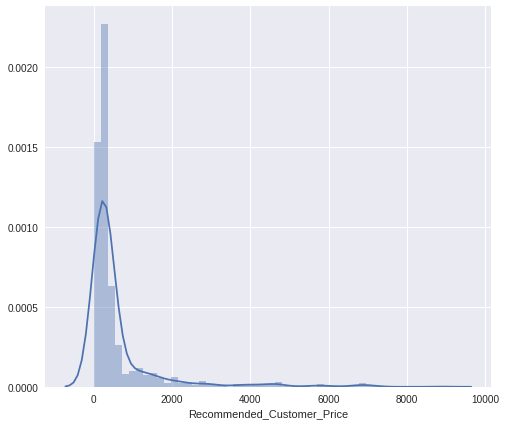

In [84]:
# discretizing price variable

sns.distplot(cpu_clean.Recommended_Customer_Price)

cpu_clean.Recommended_Customer_Price = pd.cut(cpu_clean.Recommended_Customer_Price, [0,400,800,1500,1e9], labels=['consumer', 'consumer_expensive', 'industry', 'extremely_expensive'])

cpu_clean.Recommended_Customer_Price.describe()

In [85]:
categ_features = [
    'Recommended_Customer_Price',
    'Embedded_Options_Available',
    'Execute_Disable_Bit',
    'Intel_Hyper_Threading_Technology_',
    'Intel_64_',
    'Status',
    'Desktop',
    'Embedded',
    'Mobile',
    'Server',
    'Collection',
    '32-bit',
    '64-bit',
    'Itanium 64-bit',
    'nb_of_Cores',
    'nb_of_Threads']

num_features = ['Launch_Date',
                'TDP',
               'Max_nb_of_Memory_Channels',
               'Max_Memory_Size',
               'Bus_Speed',
               'Cache',
               'Processor_Base_Frequency']

And we'll go ahead and standardize our numerical features, then move on with the rest of the analysis.

In [87]:
def standardize(feat, mu, sigma):
    return (feat - mu)/sigma

for feat in num_features:
    cpu_clean[feat] = (cpu_clean[feat] - cpu_clean[feat].mean()) / cpu_clean[feat].std()
    
cpu_clean.describe()

/usr/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Analysis on Data with Mixed Types

First things first, we should get a feel for how correlated some of the features are to see if we can tease apart some relationships. All of this data should be looked at, however, noting that data was imputed using number of cores and product collection, so any correlations with those features should be taken with a grain of salt.

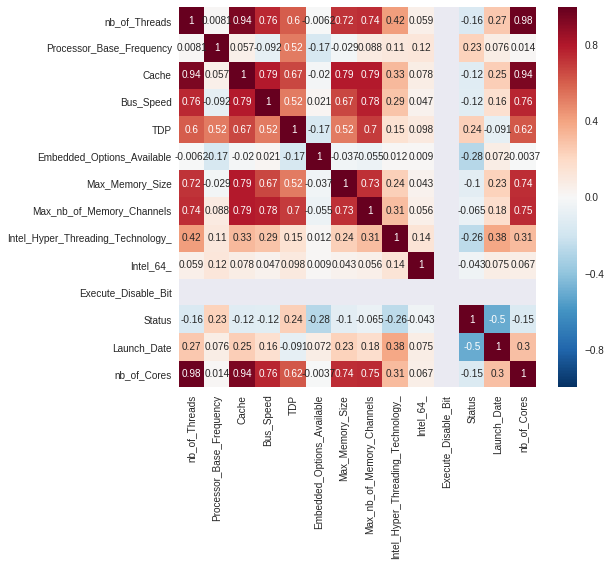

In [90]:
sns.heatmap(cpu_clean.corr(), annot=True)

Looking at the above heatmap, we see that number of Threads and Cores are, somewhat unsurprisingly, highly correlated and are also correlated with other features one would expect in a higher-end processor.

Somewhat surprisingly, base frequency does not have very many strong correlations with other measures of processor power. TDP and memory channels, however, appear to be highly correlated with some other important features.

Now, let's explore how certain variables are correlated. Let's start with comparing core numbers among price categories. 

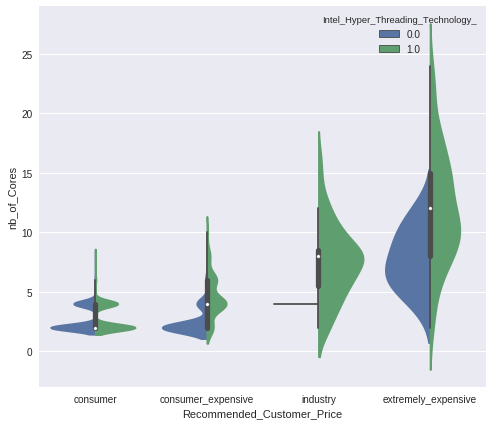

In [91]:
# violin plots are fun and informative

sns.violinplot(x='Recommended_Customer_Price', y='nb_of_Cores', hue='Intel_Hyper_Threading_Technology_', split=True, data=cpu_clean)

# maybe include counts of each group here

This plot contains some interesting insights into the data. Unsurprisingly, you can get CPUs with more cores the more money you pay. Additionally, this relationship is strongly heteroscedastic; the higher the price range, the more variable the number of cores is. This also makes sense, as there should still be very high-end CPUs with 8 or 10 cores, while we would not expect there to be any 24-core processors for \$200.

Another interesting point here is the correlation with Intel's Hyper-Threading Technology. There is almost no difference in core count between hyper-threaded and non-hyper-threaded CPUs at consumer-grade, but the difference increases the higher the price class goes. It's a little harder to say exactly why that is, but Hyper-Threading was designed for more industry-tier applications, so it stands to reason that more powerful processors would be associated with the presence of Hyper-Threading Technology.

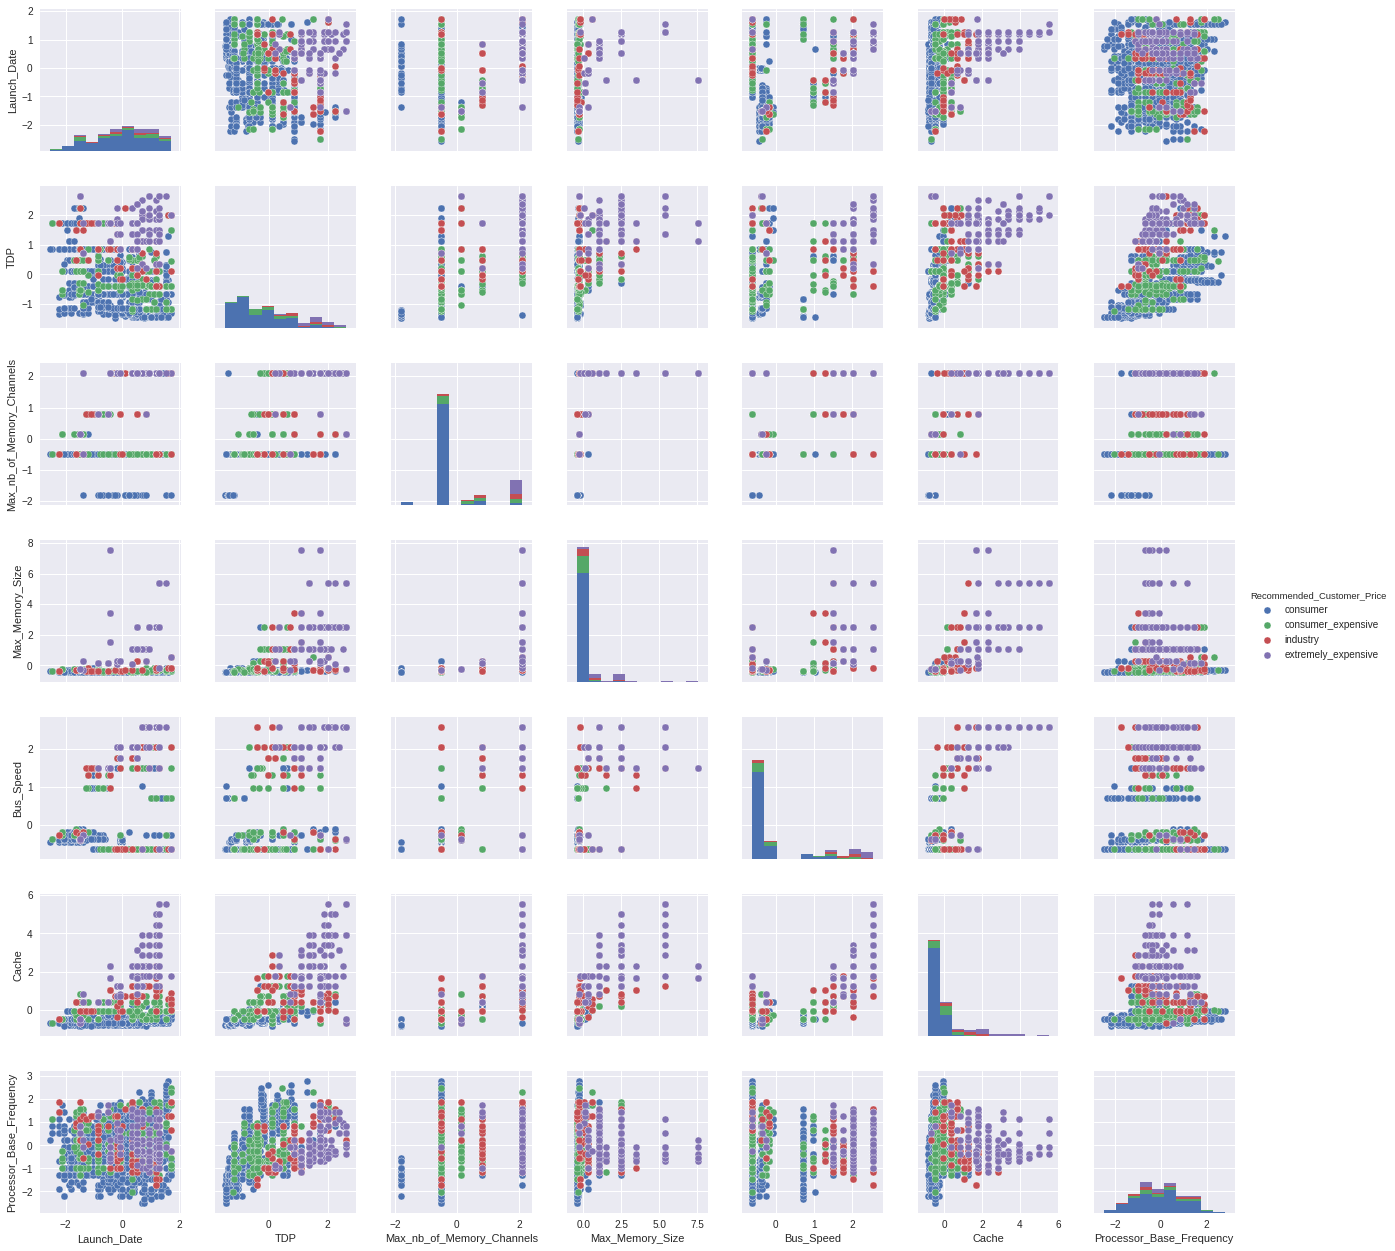

In [92]:
sns.pairplot(data=cpu_clean, vars=num_features, hue='Recommended_Customer_Price')

Much of this pairplot is not terribly useful, as much of the data is categorical with a small number of classes, but there are a few useful relationships that we can draw up between some of the numerical features. Adding jitter is a possibility, but is a partial solution at best, and there is already a lot of understanding to be gained here.

For example, TDP and clock speed appear to be roughly correlated, with what may appear at surface level to be a roughly logarithmic relation. Also, the much higher price-point processors tend to dominate the others in features like Cache at TDP even for similar values of other variables. Other features that appear roughly correlated are launch date and cache as well as bus speed and clock speed.

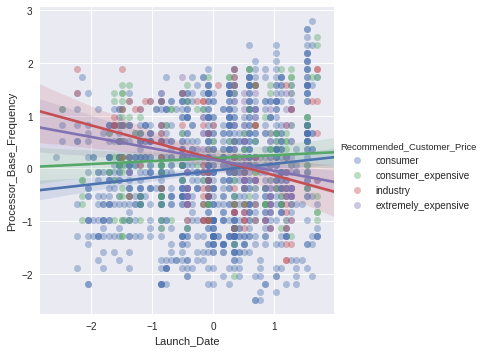

In [95]:
sns.lmplot(data=cpu_clean, x='Launch_Date', y='Processor_Base_Frequency', hue='Recommended_Customer_Price', scatter_kws={'alpha':0.4})

This data is a bit busy, and the lines produced by regression don't appear to be much different from constant. This shouldn't come as too much of a surprise, as the heatmap produced earlier showed a a linear correlation value of $0.076$, not far off from zero.

This is actually somewhat surprising, as it seems to suggest that, on average, processors have not increased

# t-SNE Time

The purpose of t-SNE is to find low-dimensional manifolds embedded in higher dimensions and reduce them down to a form that is easily visualized in two or three dimensions. This is achieved using a similarity score between each point and each other point in the dataset. The similarity score is the value of a t-distribution centered on one of the points, as follows: 

$$q_{ij} = \frac{(1+\|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l}(1 + \|y_k - y_l\|^2)^{-1}}$$

This is figured for both the high-dimensional raw data ($p_{ij}$) and for its low-dimensional representation ($q_ij$), and a stochastic gradient descent algorithm is used to adjust the low-dimensional representation to minimize their Kullback-Leibler divergence, which is calculated as:

$$KL(P\|Q) = \sum_i \sum_j p_{ij} log(\frac{p_{ij}}{q_{ij}})$$

Intuitively, this has the effect of pulling together close neighbors in the high dimensional space and causing them to cluster in the low-dimensional space to be easily identifiable by humans for visualization.

t-SNE was developed to solve some of the problems with standard SNE by using a t-distribution with 1 degree of freedom instead of a Gaussian. This both makes the gradient easier to calculate and solves the "crowding problem" with SNE, wherein large numbers of roughly equidistant points in higher dimensions will collapse in $2$ or $3$ because there are fewer arrangements in lower dimensions that can accomodate them, and the probability distribution will "exert" an attractive "force" on each of the data points. Using a t-distribution fixes this, as it has a heavier tail, which keeps the datapoints more distant.

In [100]:
from sklearn.manifold import TSNE

cpu_num = cpu_clean.loc[:,num_features]

cpu_manifold = TSNE(n_components=3, learning_rate=300).fit_transform(cpu_num)

(1495, 3)

In [101]:
import plotly.offline as py

py.init_notebook_mode()

from plotly.graph_objs import Scatter3d, Marker, Layout, XAxis, YAxis

In [104]:
py.iplot( {
    'data': [
        Scatter3d(
            x=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'consumer' ,0],
            y=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'consumer' ,1],
            z=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'consumer' ,2],
            mode='markers',
            name='consumer',
            marker=Marker(
                size=4,
                color='red',
                opacity=0.2
            )
        ),
        
        Scatter3d(
            x=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'consumer_expensive' ,0],
            y=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'consumer_expensive' ,1],
            z=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'consumer_expensive' ,2],
            mode='markers',
            name='consumer_expensive',
            marker=Marker(
                size=4,
                color='blue',
                opacity=0.2
            )
        ),
        
        Scatter3d(
            x=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'industry' ,0],
            y=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'industry' ,1],
            z=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'industry' ,2],
            mode='markers',
            name='industry',
            marker=Marker(
                size=4,
                color='light green',
                opacity=0.2
            )
        ),
        
        Scatter3d(
            x=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'extremely_expensive' ,0],
            y=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'extremely_expensive' ,1],
            z=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'extremely_expensive' ,2],
            mode='markers',
            name='extremely_expensive',
            marker=Marker(
                size=4,
                color='black',
                opacity=0.2
            )
        )
    ],
    
    'layout': Layout(
        xaxis = XAxis(),
        yaxis = YAxis(),
        title = 't-SNE Embedded Manifold, Colored by Price Range',
        showlegend = True
    )
}
)

Before discussing the results of this visualization, it is worth noting two things about t-SNE:

1. Because t-SNE only cares about proximity of datapoints to each other when translating them to fewer dimensions and does not take into account absolute position, the actual location of these points, and other aspects of the manifolds (shape, orientation, even proximity to other manifolds) don't actually provide useful information. We should really only be looking at what the clusters are.
2. t-SNE is fairly accurate when translating embedded low-dimensional manifolds, but even in the paper where it was proposed, the authors acknowledge that sometimes it will put points in clusters that they really shouldn't be in. A few "outlier" points in a certain cluster that is dominated by one or two other classes shouldn't affect our analysis.

Now, let's get data-sciency.

The above scatterplot tells us a couple of interesting things about our data. The first is that the "industry" and the "extremely expensive" CPUs almost always cluster together, without much interaction with the other datapoints from other classes, with the exception of sometime industry-priced processors. Note in particular the small clusters near the -y,-z end of the data and the small, densely-packed blobs of green strewn about.

Also, the "consumer" processors tend to clump together and make up a large majority of the dataset. On the other hand, the "consumer expensive" datapoints are scattered about and dominate very few cluster. This may indicate that we have discretized the price data poorly, such that it might be more accurate to draw the divisions differently. However, many of the other classes seem to be separated with some fidelity to actual clumpings in higher dimensions.

Let's now look at the data colored by a different feature.

In [103]:
py.iplot( {
    'data': [
        Scatter3d(
            x=cpu_manifold[:,0],
            y=cpu_manifold[:,1],
            z=cpu_manifold[:,2],
            mode='markers',
            marker=Marker(
                size=4,
                color=cpu_clean.nb_of_Cores,
                colorscale='Viridis',
                opacity=0.2,
                showscale=True
            )
        ),
    ],
    
    'layout': Layout(
        xaxis = XAxis(),
        yaxis = YAxis(),
        title = 't-SNE Embedded Manifold, Colored by Number of Cores',
        showlegend = False
    )
}
)

If we compare the colorings of the manifolds in this plot with their colorings in the previous plot, we should not be surprised to see that many of the clusters dominated by "consumer" CPUs are now very dark, indicating 2, 4, or 8 cores, and the primarily "industry" and "extremely expensive" clusters are very yellow and green.

Also, looking at this plot compared to the previous plot reinforces the idea that there might not actually be that much of a difference between the "consumer" and "consumer expensive" categories. 

Other than that, there isn't too much else to be gained from looking at this plot. Powerful processors tend to be close to other powerful processors along similar axes in high-dimensional space, which is what we've come to expect.